R2: 0.772297 | Training: ========================================


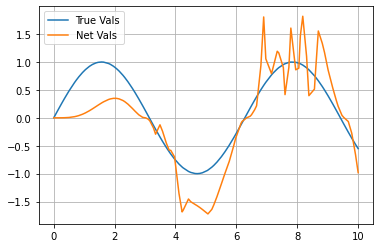

In [8]:
import matplotlib.pyplot as plt
from main import *
import numpy as np
import random as rn
import math as m
from time import perf_counter as pc

n1 = AdvNet(1, [25], 1, "resu")

X = np.linspace(0, 10, 100) + np.random.uniform(0, 0.1, 100)
Y = np.sin(X)

n1, r2 = genTrain(n1, X, Y, iterations=7,
                   batchSize=300, gamma=1, useFast=True)

y1 = Forecast(n1, X, plotResults=False)

plt.plot(X, Y)
plt.plot(X, y1)

plt.grid(True)
plt.legend(["True Vals", "Net Vals"])
plt.show()


                  Neural Net Characteristics:                   
1. Layer Sizes = [1, 20, 20, 20, 1]
2. Weight Medians = [0.09, -0.03, 0.01, -0.04]
3. Number of Parameters: 840
4. Activation Functions: ['ATAN', 'ELU', 'ATAN', 'NONE']
R2: 0.892506 | Training: ========================================


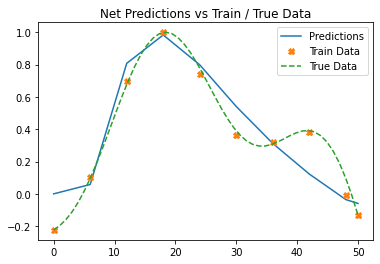

In [2]:
## Training Tests ##

# Setup net
NN = AdvNet(1, [20]*3, 1, ["ATAN", "ELU", "ATAN", "NONE"])
print(NN)

# Make X and Y data
xArr = np.linspace(0, 11)

yT = [m.sin(i + 4) - i**2/10 + i for i in xArr]
yArr = np.array(yT)
yArr = yArr / np.max(yArr)

# Thin data
xThin, yThin, xPlot = thinData(xArr, yArr, 10)

# Train net
NN, R2 = genTrain(NN, xThin, yThin, batchSize=50, iterations=420)

# Net Predictions
yHatThin = Forecast(NN, xThin, plotResults=False)

# Plot predictions and such
plt.plot(xPlot, yHatThin)
plt.plot(xPlot, yThin, 'X')
plt.plot(xArr*50/11, yArr, '--')
plt.legend(["Predictions", "Train Data", "True Data"])
plt.title("Net Predictions vs Train / True Data")
plt.show()

In [38]:
# Gradient Tests
size = 3
acts = ["ATAN"]
net = AdvNet(1, [15]*(size-1), 1, [rn.choice(acts) for _ in range(size)])

# Data
xData = np.arange(0, 3, 0.5).tolist()
yTrue = [(xi+(rn.random()-0.5))**2 for xi in xData]

# Functions
def getScore(X, Y, NN):
    yHat = [NN.Calculate(xi) for xi in X]
    diffs = [abs(yi-yhi) for yi, yhi in zip(Y, yHat)]
    return sum(diffs)

# Training
# Initial Score
best = getScore(xData, yTrue, net)
bestCopy = best
print(f"Initial Score: {best}\n")

# Training (Standard single batch)
for i in range(3):
    newScore = best + 1
    while newScore > best:
        net2 = net.CopyNet()
        net2.TweakWeights(1/(i+1))
        newScore = getScore(xData, yTrue, net2)
    best = newScore
    print(f"Score {i+1}: {best}")
print()

# Training (gradient)
print("With Gradient:")
dW = None
for i in range(3):
    newScore = bestCopy + 1
    if dW == None:
        while newScore > bestCopy:
            net3 = net.CopyNet()
            dW = net3.TweakWeights(1/(i+1), returnChange=True)
            newScore = getScore(xData, yTrue, net3)
    else:
        for _ in range(20):
            done = False
            dW = [wi/(1.05) for wi in dW]
            net3 = net.CopyNet()
            net3.ApplyTweak(dW)
            newScore = getScore(xData, yTrue, net3)
            if newScore < bestCopy:
                done = True
                print("Used Gradient")
                break
        if not done:
            while newScore > bestCopy:
                net3 = net.CopyNet()
                dW = net3.TweakWeights(1/(i+1), returnChange=True)
                newScore = getScore(xData, yTrue, net3)
    bestCopy = newScore
    print(f"Score {i+1}: {bestCopy}")


Initial Score: 16.307604159500553

Score 1: 11.745016447379008
Score 2: 11.738644745022901


KeyboardInterrupt: 